# Predicting the Next Turn: Summary and Local Feature model
This notebook contains the feature engineering for summary and local features to predict a turn-taking (SWITCH or HOLD the turn). The summary features are extracted from the TextGrid, so that is done in this Jupyter Notebook. The summary features are extracted using Praat, and further processed in this notebook. To know which features are going to be extracted, I refer you to my report.

## Summary features

In [118]:
# Change the directory from where this notebook is saved to where all the HCRC files are stored
import os
os.chdir("C:\\Users/Guido vd Heijden/Documents/School/Master - year 1 - 1b/Speech Processing/Praat/HCRC")

In [48]:
# Import the Python library TextGridTools
import tgt
# Import the Python library for regular expressions
import re

import numpy as np

In [461]:
def generate_turn_transition_labels(merged_textgrid_single_dialogue):
    '''
    This function generates turn transtion labels using a merged_textgrid_single_dialogue. The TextGrid  should contain
    two tiers with only 'silence' and 'speech' annotations, one for each speaker.
    The TextGrid is transformed to a list of intervals with 6 speech labels:
        g-moves..., f-moves, bso, bss, wso, wss.
    
    The function looks for silences that are longer than 180 ms where only a single speaker continues speaking
    in the one second after the silence (either pause or gap) ends.
    
    When the above condition is met, the function returns the start of the pauze, and whether there was a 
    turn transition (SWITCH) or not (HOLD).
    '''
    chrono = tgt.util.chronogram(merged_textgrid_single_dialogue.tiers[:2],
                                 speech_label='speech',silence_label='silent')
    transition_labels = []
    for pause in chrono.get_annotations_with_matching_text("bss|wss", regex=True):
        if pause.duration() < 0.180:
            continue
        
        else:
            continuation_texts = [annotation.text for annotation in 
                                  chrono.get_annotations_between_timepoints(pause.end_time, pause.end_time+1.0,
                                                                            left_overlap=True, right_overlap=True)]
            # There is only one speaker, or one speaker with a wss after the pause
            if len(continuation_texts) == 1 or \
               continuation_texts.count('wss')+len(list(filter(re.compile('g-moves.*').match, continuation_texts))) \
                                                                                      == len(continuation_texts) or \
               continuation_texts.count('wss')+len(list(filter(re.compile('f-moves.*').match, continuation_texts))) \
                                                                                      == len(continuation_texts):
                utterance_before_pauze = chrono.get_annotation_by_end_time(pause.start_time)
                speaker = utterance_before_pauze.text[0]
                if pause.text[:3] == 'wss':
                    transition = "HOLD"
                else:
                    transition = "SWITCH"
                transition_labels.append( (pause.start_time, speaker, transition) )

    return transition_labels

In [462]:
# Example
tgmerged=tgt.read_textgrid("TextGrids_moves/q1ec2.merged.moves.TextGrid")
for elem in generate_turn_transition_labels(tgmerged):
    print(elem)

print("\n\n")
chrono = tgt.util.chronogram(tgmerged.tiers[:2],
                               speech_label='speech',silence_label='silent')
for elem in chrono.annotations:
    print(elem)

(0.2932, 'g', 'HOLD')
(2.5494, 'g', 'HOLD')
(3.4882, 'g', 'HOLD')
(22.9389, 'g', 'SWITCH')
(27.3596, 'f', 'SWITCH')
(27.868, 'g', 'HOLD')
(32.6264, 'g', 'HOLD')
(37.0936, 'f', 'HOLD')
(42.0503, 'g', 'SWITCH')
(42.9147, 'f', 'HOLD')
(55.8492, 'g', 'SWITCH')
(56.5746, 'f', 'HOLD')
(66.3106, 'f', 'SWITCH')
(74.2055, 'g', 'HOLD')
(82.0103, 'f', 'SWITCH')
(86.5054, 'g', 'HOLD')
(91.2824, 'f', 'SWITCH')
(94.2343, 'g', 'SWITCH')
(98.0543, 'f', 'HOLD')
(115.8119, 'f', 'SWITCH')
(118.7823, 'g', 'SWITCH')
(134.7132, 'f', 'SWITCH')
(138.2503, 'g', 'SWITCH')
(143.2075, 'g', 'SWITCH')
(147.1882, 'f', 'SWITCH')
(150.0224, 'g', 'HOLD')
(151.0567, 'g', 'HOLD')
(160.0889, 'f', 'SWITCH')
(163.5083, 'f', 'SWITCH')
(166.3006, 'g', 'SWITCH')
(169.5327, 'f', 'SWITCH')
(182.5219, 'f', 'SWITCH')
(186.8993, 'f', 'SWITCH')
(187.3886, 'g', 'HOLD')
(195.218, 'g', 'SWITCH')
(198.4078, 'f', 'SWITCH')
(210.086, 'f', 'SWITCH')
(211.8581, 'g', 'HOLD')
(216.0363, 'f', 'SWITCH')
(226.1821, 'f', 'HOLD')
(228.5993, 'g', '

In [463]:
# Import library for path expansion
from glob import glob

label_dict = {}
for path in glob("TextGrids_moves/*.merged.moves.TextGrid"):
    dialogue_id = path[16:21]
    current_tg = tgt.read_textgrid(path)
    label_dict[dialogue_id] = generate_turn_transition_labels(current_tg)

print(label_dict)

{'q1ec1': [(4.4697, 'f', 'SWITCH'), (20.0857, 'g', 'SWITCH'), (24.4598, 'g', 'HOLD'), (33.5046, 'g', 'HOLD'), (45.639, 'g', 'HOLD'), (65.1843, 'f', 'SWITCH'), (71.8775, 'g', 'HOLD'), (89.1831, 'g', 'HOLD'), (100.3623, 'g', 'HOLD'), (108.0563, 'f', 'SWITCH'), (118.6734, 'g', 'HOLD'), (120.7881, 'g', 'HOLD'), (131.3837, 'f', 'SWITCH'), (132.1385, 'g', 'HOLD'), (139.2663, 'g', 'HOLD'), (141.539, 'g', 'HOLD'), (153.0925, 'f', 'SWITCH'), (163.0453, 'f', 'SWITCH'), (166.3029, 'f', 'SWITCH'), (186.6352, 'g', 'SWITCH'), (189.4847, 'g', 'HOLD'), (213.5397, 'g', 'SWITCH'), (216.3519, 'g', 'HOLD'), (235.3703, 'g', 'HOLD'), (248.3585, 'g', 'HOLD'), (251.8763, 'g', 'HOLD'), (256.2229, 'g', 'SWITCH'), (259.9857, 'g', 'SWITCH')], 'q1ec2': [(0.2932, 'g', 'HOLD'), (2.5494, 'g', 'HOLD'), (3.4882, 'g', 'HOLD'), (22.9389, 'g', 'SWITCH'), (27.3596, 'f', 'SWITCH'), (27.868, 'g', 'HOLD'), (32.6264, 'g', 'HOLD'), (37.0936, 'f', 'HOLD'), (42.0503, 'g', 'SWITCH'), (42.9147, 'f', 'HOLD'), (55.8492, 'g', 'SWITCH'

The transition labels were then used to extract local and summary features. First, the summary features will be extracted using the the TextGrids above. Then, the transition labels will be stored in a text file, such that they can be used for extracting local features in Praat.

In [464]:
def generate_summary_features(merged_textgrid_single_dialogue, transition_labels):
    '''
    This function generates summary features as described by Meshorer & Heeman (2016). The summary features
    are generated for each speaker, but only expressed in time instead of also in words.
    '''    
    if re.match(re.compile('f-.*'), merged_textgrid_single_dialogue.tiers[0].name) == None:
        if re.match(re.compile('g-.*'), merged_textgrid_single_dialogue.tiers[0].name) == None:
            raise Exception("TextGrid is neither instruction follower or giver!")
        else:
            f_tier = merged_textgrid_single_dialogue.tiers[1]
            g_tier = merged_textgrid_single_dialogue.tiers[0]
    else:
        f_tier = merged_textgrid_single_dialogue.tiers[0]
        g_tier = merged_textgrid_single_dialogue.tiers[1]

    
    summary_features = []
    for i, (pause_start, speaker, _) in enumerate(transition_labels):        
        # Calculating relative turn length for instruction follower
        turns_f = [interval.duration() for interval in f_tier 
                   if interval.end_time <= pause_start and interval.text == "speech"]
        if len(turns_f) == 0:
            rel_turn_length_f = 1.0
        else:
            avg_turn_length_f = sum(turns_f) / len(turns_f)
            rel_turn_length_f = turns_f[-1] / avg_turn_length_f
        
        # Calculating relative turn length for instruction giver
        turns_g = [interval.duration() for interval in g_tier 
                   if interval.end_time <= pause_start and interval.text == "speech"]
        if len(turns_g) == 0:
            rel_turn_length_g = 1.0
        else:
            avg_turn_length_g = sum(turns_g) / len(turns_g)
            rel_turn_length_g = turns_g[-1] / avg_turn_length_g
        
        # Calculating relative floor control for instruction follower and giver
        conversation_length = sum(turns_f) + sum(turns_g)
        rel_floor_control_f = sum(turns_f) / conversation_length
        rel_floor_control_g = sum(turns_g) / conversation_length
        
        # Each time in the dialogue will become a datapoint, which is organised as shown in the append below:
        if speaker == 'f':
            summary_features.append([pause_start, rel_turn_length_f, rel_turn_length_g,
                                                  rel_floor_control_f, rel_floor_control_g])
        elif speaker == 'g':
            summary_features.append([pause_start, rel_turn_length_g, rel_turn_length_f,
                                                  rel_floor_control_g, rel_floor_control_f])
        
    return summary_features

In [465]:
# Example
tgmerged=tgt.read_textgrid("TextGrids_moves/q1ec2.merged.moves.TextGrid")
for elem in generate_summary_features(tgmerged, label_dict["q1ec2"]):
    print(elem)

[0.2932, 1.0, 1.0, 1.0, 0.0]
[2.5494, 1.6344367558132287, 1.0, 1.0, 0.0]
[3.4882, 0.38646608374518016, 1.0, 1.0, 0.0]
[22.9389, 0.10364173974576056, 1.0, 0.9440025574837414, 0.055997442516258655]
[27.3596, 0.8085437785665051, 0.10189652345438534, 0.16289003685125583, 0.8371099631487442]
[27.868, 0.10726289782039625, 0.8085437785665051, 0.8392046247711016, 0.1607953752288984]
[32.6264, 0.6498532716132741, 1.4280766956668627, 0.8049742359747498, 0.1950257640252502]
[37.0936, 0.4633587429266268, 0.047958115974329626, 0.19505290683532003, 0.8049470931646798]
[42.0503, 0.12980504934536666, 2.7976573423154725, 0.7233349022662966, 0.27666509773370346]
[42.9147, 0.3688676768434483, 0.12980504934536666, 0.28511772521781914, 0.7148822747821809]
[55.8492, 0.10340939437998867, 0.34234514755450984, 0.7024781712485813, 0.29752182875141864]
[56.5746, 0.4191990143564361, 0.10340939437998867, 0.30500664497502405, 0.694993355024976]
[66.3106, 2.881988703471982, 0.10340939437998867, 0.3605595201703436, 0

In [466]:
summary_features_dict = {}
for path in glob("TextGrids_moves/*.merged.moves.TextGrid"):
    dialogue_id = path[16:21]
    current_tg = tgt.read_textgrid(path)
    summary_features_dict[dialogue_id] = generate_summary_features(current_tg, label_dict[dialogue_id])

print(summary_features_dict)

{'q1ec1': [[4.4697, 1.0, 1.8327664111285982, 0.08071780272092957, 0.9192821972790705], [20.0857, 2.367195155253562, 1.0, 0.9818156010472194, 0.018184398952780467], [24.4598, 0.054276176793712855, 1.6348569618916926, 0.9090332926817557, 0.09096670731824422], [33.5046, 0.10819314425344081, 0.7941553149377097, 0.9047416597657637, 0.09525834023423628], [45.639, 0.2081297578158384, 1.6811591351734225, 0.8705394550182484, 0.1294605449817517], [65.1843, 0.47859224794973265, 0.7591175614822394, 0.09619684852875603, 0.903803151471244], [71.8775, 1.3435132440777005, 0.47859224794973265, 0.912878692289251, 0.08712130771074902], [89.1831, 1.5173621148885876, 0.4873972791934323, 0.9077632737190616, 0.09223672628093842], [100.3623, 0.42351637224449545, 1.1301748260110434, 0.9057753259937554, 0.09422467400624458], [108.0563, 0.5068893000379135, 1.1580024305722398, 0.09254229429255709, 0.907457705707443], [118.6734, 2.1729410442108, 0.5068893000379135, 0.9162312283403927, 0.08376877165960735], [120.78

## Local features
The local features are now extracted based on the utterance before each silence. A batch file (.bat) will be generated to run the Praat script for each utterance. The Praat script takes as arguments:
- The session ID
- The speaker
- The utterance start time  
- The pause start time (same as the end of utterance)
- The turn-taking action (SWITCH or HOLD)
- The verbosity of the Praat script

### Batch commands for running praat script

In [190]:
chrono.get_annotation_by_end_time(generate_turn_transition_labels(tgmerged)[7][0])

Interval(36.9575, 37.0936, "f-moves-q1eta2-f")

In [256]:
def generate_praat_input(dialogue_id, merged_textgrid_single_dialogue):
    chrono = tgt.util.chronogram(merged_textgrid_single_dialogue.tiers[:2],
                                 speech_label='speech',silence_label='silent')
    
    praat_input = []
    for pauze_start, transition in label_dict[dialogue_id]:
        utterance_before_pauze = chrono.get_annotation_by_end_time(pauze_start)
        speaker = utterance_before_pauze.text[0]
        utterance_start_time = utterance_before_pauze.start_time
        
        praat_input.append([dialogue_id, speaker, str(utterance_start_time), str(pauze_start),
                            transition, "0"])
    return praat_input

In [257]:
# Example
tgmerged=tgt.read_textgrid("TextGrids_moves/q1ec2.merged.moves.TextGrid")
for elem in generate_praat_input("q1ec2", tgmerged):
    print(elem)

['q1ec2', 'g', '0.0', '0.2932', 'HOLD', '0']
['q1ec2', 'g', '1.2385', '2.5494', 'HOLD', '0']
['q1ec2', 'g', '3.251', '3.4882', 'HOLD', '0']
['q1ec2', 'g', '22.5956', '22.9389', 'SWITCH', '0']
['q1ec2', 'f', '26.3041', '27.3596', 'SWITCH', '0']
['q1ec2', 'g', '27.5548', '27.868', 'HOLD', '0']
['q1ec2', 'g', '32.2714', '32.6264', 'HOLD', '0']
['q1ec2', 'f', '36.9575', '37.0936', 'HOLD', '0']
['q1ec2', 'g', '41.7833', '42.0503', 'SWITCH', '0']
['q1ec2', 'f', '42.4776', '42.9147', 'HOLD', '0']
['q1ec2', 'g', '55.6647', '55.8492', 'SWITCH', '0']
['q1ec2', 'f', '56.1096', '56.5746', 'HOLD', '0']
['q1ec2', 'f', '62.5191', '66.3106', 'SWITCH', '0']
['q1ec2', 'g', '73.8433', '74.2055', 'HOLD', '0']
['q1ec2', 'f', '81.6714', '82.0103', 'SWITCH', '0']
['q1ec2', 'g', '86.4164', '86.5054', 'HOLD', '0']
['q1ec2', 'f', '90.8635', '91.2824', 'SWITCH', '0']
['q1ec2', 'g', '92.0827', '94.2343', 'SWITCH', '0']
['q1ec2', 'f', '97.1082', '98.0543', 'HOLD', '0']
['q1ec2', 'f', '115.7915', '115.8119', 'SWITC

In [258]:
all_praat_input = []
for path in glob("TextGrids_moves/*.merged.moves.TextGrid"):
    dialogue_id = path[16:21]
    current_tg = tgt.read_textgrid(path)
    all_praat_input += generate_praat_input(dialogue_id, current_tg)

print(all_praat_input)

[['q1ec1', 'f', '4.1238', '4.4697', 'SWITCH', '0'], ['q1ec1', 'g', '5.3492', '20.0857', 'SWITCH', '0'], ['q1ec1', 'g', '24.2493', '24.4598', 'HOLD', '0'], ['q1ec1', 'g', '33.3109', '33.5046', 'HOLD', '0'], ['q1ec1', 'g', '44.1784', '45.639', 'HOLD', '0'], ['q1ec1', 'f', '64.7437', '65.1843', 'SWITCH', '0'], ['q1ec1', 'g', '65.8959', '71.8775', 'HOLD', '0'], ['q1ec1', 'g', '86.8071', '89.1831', 'HOLD', '0'], ['q1ec1', 'g', '99.3531', '100.3623', 'HOLD', '0'], ['q1ec1', 'f', '107.717', '108.0563', 'SWITCH', '0'], ['q1ec1', 'g', '108.825', '118.6734', 'HOLD', '0'], ['q1ec1', 'g', '119.5891', '120.7881', 'HOLD', '0'], ['q1ec1', 'f', '130.9207', '131.3837', 'SWITCH', '0'], ['q1ec1', 'g', '131.8461', '132.1385', 'HOLD', '0'], ['q1ec1', 'g', '138.8776', '139.2663', 'HOLD', '0'], ['q1ec1', 'g', '139.5101', '141.539', 'HOLD', '0'], ['q1ec1', 'f', '153.008', '153.0925', 'SWITCH', '0'], ['q1ec1', 'f', '162.6194', '163.0453', 'SWITCH', '0'], ['q1ec1', 'f', '165.9308', '166.3029', 'SWITCH', '0'], [

In [407]:
# Multiple batch scripts are created to run concurrently
executions_per_batch = (len(all_praat_input) // 5)
with open("../all_praat_executions.bat", "w+") as batch_file:
    for i, praat_input in enumerate(all_praat_input):
        if not (i % executions_per_batch):
            sub_batch_file = open("../batch_files/praat_executions_"+str(i//executions_per_batch)+".bat", "w+")
            batch_file.write('START  "Praat sub-batch process'+str(i//executions_per_batch)+'" batch_files\praat_executions_'+str(i//executions_per_batch)+'.bat\n')
        
        sub_batch_file.write('praat.exe --run "feature_extraction_summary_local_model.praat" ' + ' '.join(praat_input) + '\n')
        
        if not ((i+1) % executions_per_batch):
            sub_batch_file.close()
sub_batch_file.close()

### Read in Praat output and normalize

In [480]:
# Read local features generated by Praat
import csv

local_features_dict = {}
for path in glob("local_features/*.csv"):
    session_speaker_id = path[-11:-4]
    local_features_dict[session_speaker_id] = []
    with open(path, newline='') as praat_output:
        reader = csv.reader(praat_output, delimiter=',')
        for row in reader:
            local_features_dict[session_speaker_id].append([np.nan if re.match(r'[0-9]+', elem) is None or float(elem) == 0
                                                            else float(elem)
                                                            for elem in row])

In [481]:
local_features_dict

{'q1ec1_f': [[4.4697,
   395.79739632537616,
   168.60205614188214,
   5.782017924255575,
   64.80178825687189,
   64.80178825687189,
   245.06141147554038,
   245.06141147554038,
   0.34589999999999943,
   0.01830844835535499,
   0.061963502284699816,
   18.501093712118106],
  [65.1843,
   176.94926292837755,
   110.53082925140966,
   4.5392646391285725,
   60.99341008409923,
   60.99341008409923,
   224.03850210448016,
   224.03850210448016,
   0.4405999999999892,
   0.018585382291655773,
   0.07663833578778913,
   17.11677180216571],
  [108.0563,
   203.67535591994533,
   107.04082865593607,
   2.94724432655472,
   57.305327179664545,
   57.305327179664545,
   208.49023807767608,
   208.49023807767608,
   0.3392999999999944,
   0.019676097475162073,
   0.09065076566830418,
   15.158812504884658],
  [131.3837,
   465.7294556904562,
   205.8340850916506,
   2.159827213822923,
   60.65417482572528,
   60.65417482572528,
   195.56044931889528,
   195.56044931889528,
   0.462999999999993

In [484]:
def z_normalize(series):
    mean = np.mean(series)
    std  = np.std(series)
    if std == 0: # Handle speakers that only have one utterance
        std = 1
    return [(val - mean) / std for val in series]



import pandas as pd # allows for creating dataframes that have columns and rows

def z_normalize_local_features(local_features_dict):
    z_normalized_local_features_dict = {}
    for session_speaker_id, session_speaker_local_features in local_features_dict.items():
        session_id = session_speaker_id[:5]
        
        feature_df = pd.DataFrame(session_speaker_local_features)
        for c in feature_df.columns[1:]:
            feature_df[c] = z_normalize(feature_df[c])
        
        if session_id not in z_normalized_local_features_dict.keys():
            z_normalized_local_features_dict[session_id] = feature_df.values.tolist()
        else:
            z_normalized_local_features_dict[session_id] += feature_df.values.tolist()
            z_normalized_local_features_dict[session_id] = sorted(z_normalized_local_features_dict[session_id], key=lambda x : x[0])
    return z_normalized_local_features_dict

z_normalized_local_features_dict = z_normalize_local_features(local_features_dict)
print(z_normalized_local_features_dict)

{'q1ec1': [[4.4697, 0.9207208259772819, 0.4227424923367773, 1.162742296912634, 0.9945606709048389, 0.9945606709048389, 1.6821175434168127, 1.6821175434168127, -0.060435010425926236, -0.03285827737508321, -1.2994059291852318, 1.6926522391143726], [20.0857, nan, -0.45538272686785153, -0.43575285296959, 0.7002224769964708, -0.04391797088295097, 1.4952068856560137, 1.8552001194587913, 2.1224830647047326, 0.8779938586960994, -0.7951927253270583, 0.6015257052758634], [24.4598, 1.0644627536098863, 2.682830369840576, 1.5361582122216126, 1.4301402720599643, 1.4255821372473085, -0.0065957001441898765, 0.28764881425506295, -0.8069388328598086, -0.10267225008053069, -0.7580778168758846, 1.8845135263747235], [33.5046, 0.9411175386877095, 0.5436194417480271, 1.8431065467772683, 0.20283570893675754, 0.13500620705054187, 0.9157838590658174, 1.339865785685105, -0.8103268466198983, 0.031052139653602834, -0.3089391932803534, 1.549359387889685], [45.639, nan, nan, 1.0573724091382668, -0.30790607970614153,

## Final preprocessing
All features have now been engineered. As a final step, the summary and local features are combined with the label, and the data is split between a training and test set. Some features contain quite a lot of missing values, since the pitch could sometimes not be picked up close to the pause. These missing values were replaced by medians, such that these features are still somewhat useful.

The dataset is split between a training and test set, where the training set contains 93 dialogues (quads 1-6) and the test set the remaining 32 dialogues (quads 7 & 8)

In [530]:
training_set = []
test_set = []

for session_id in label_dict.keys():
    for summary_features, local_features, label in \
     zip(summary_features_dict[session_id], z_normalized_local_features_dict[session_id], label_dict[session_id]):
        datapoint = []
        # Check whether the pause starts of label_dict, summary_features_dict and local_features_dict are the same
        if summary_features[0] == local_features[0] and label[0] == local_features[0]:
            datapoint += summary_features[1:]
            datapoint += local_features[1:]
            datapoint.append(label[2])
        else:
            raise Exception("pause_start times do not line up between feature sets!"+session_id+str(summary_features[0])+
                            str(local_features[0])+str(label[0]))

        if re.match(re.compile('q[1-6]'), session_id) != None:
            training_set.append(datapoint)
        elif re.match(re.compile('q[7-8]'), session_id) != None:
            test_set.append(datapoint)

# s0 is the most recent speaker, and s1 is the other speaker. The prosodic features are only for the most recent speaker 
feature_names = ["turn_length_s0", "turn_length_s1", "floor_control_s0", "floor_control_s1", "intonation_200ms", 
                 "intonation_300ms", "speaking_rate", "intensity_500ms", "intensity_1000ms", "pitch_500ms",
                  "pitch_1000ms", "duration", "jitter", "shimmer", "noise_to_harmonics", "label"]
training_df = pd.DataFrame(training_set, columns=feature_names)
test_df = pd.DataFrame(test_set, columns=feature_names)

In [541]:
# Create training dataframe that excludes datapoints with four or more missing values
training_df = training_df[training_df.isna().sum(axis=1) < 4]

# Replace missing values with median for all columns except the label. The median is only based
# on the datapoints in the training set
for column in training_df.columns[:15]:
    training_df[column].fillna(training_df[column].median(),inplace=True)
    test_df[column].fillna(training_df[column].median(),inplace=True)

In [500]:
# DO NOT RUN THIS CELL IF YOU WANT TO EXCLUDE MISSING DATA AS DESCRIBED IN THE PREVIOUS CELL

# Replace missing values with median for all columns except the label. The median is only based
# on the datapoints in the training set
for column in training_df.columns[:15]:
    training_df[column].fillna(training_df[column].median(),inplace=True)
    test_df[column].fillna(training_df[column].median(),inplace=True)

# Modelling: Random Forest

In [526]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

for key, values in random_grid.items():
    print(key, values)

n_estimators [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_features ['auto', None]
max_depth [5, 7, 9, 11, 13, 16, 18, 20, 22, 25, None]
min_samples_split [2, 5, 10]
min_samples_leaf [1, 2, 4]


In [527]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=2021)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=2021, n_jobs = -1)
rf_random.fit(training_df[feature_columns], training_df.label)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 55.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 16, 18,
                                                      20, 22, 25, None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=2021, verbose=1)

In [528]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [550]:
from sklearn.ensemble import RandomForestClassifier

feature_columns = training_df.columns[:15]

clf = RandomForestClassifier(n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features='auto', 
                             max_depth=None, random_state=2021)
clf.fit(training_df[feature_columns], training_df.label)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

print("Training evaluation")
y_true = training_df.label
y_pred = clf.predict(training_df[feature_columns])
print(classification_report(y_true, y_pred, digits=4))
print(confusion_matrix(y_true, y_pred))
print("accuracy: ", accuracy_score(y_true, y_pred))
print("f1-score: ", f1_score(y_true, y_pred, pos_label="HOLD", average='weighted'))

print("Test evaluation")
y_true = test_df.label
y_pred = clf.predict(test_df[feature_columns])
print(classification_report(y_true, y_pred, digits=4))
print(confusion_matrix(y_true, y_pred))
print("accuracy: ", accuracy_score(y_true, y_pred))
print("f1-score: ", f1_score(y_true, y_pred, pos_label="HOLD", average='weighted'))

Training evaluation
              precision    recall  f1-score   support

        HOLD     0.9494    0.8306    0.8861      1854
      SWITCH     0.9229    0.9786    0.9499      3840

    accuracy                         0.9305      5694
   macro avg     0.9362    0.9046    0.9180      5694
weighted avg     0.9315    0.9305    0.9292      5694

[[1540  314]
 [  82 3758]]
accuracy:  0.9304531085353003
f1-score:  0.9291518571542304
Test evaluation


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'HOLD') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


              precision    recall  f1-score   support

        HOLD     0.7199    0.6401    0.6777       739
      SWITCH     0.8252    0.8722    0.8481      1440

    accuracy                         0.7935      2179
   macro avg     0.7726    0.7561    0.7629      2179
weighted avg     0.7895    0.7935    0.7903      2179

[[ 473  266]
 [ 184 1256]]
accuracy:  0.7934832491968793
f1-score:  0.7902765337375306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'HOLD') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature ranking:
1. feature 2 (0.176854)
2. feature 3 (0.170701)
3. feature 0 (0.108710)
4. feature 11 (0.097207)
5. feature 6 (0.046786)
6. feature 14 (0.045276)
7. feature 1 (0.044104)
8. feature 7 (0.043856)
9. feature 8 (0.042469)
10. feature 9 (0.040712)
11. feature 10 (0.040687)
12. feature 12 (0.036597)
13. feature 13 (0.036472)
14. feature 4 (0.035488)
15. feature 5 (0.034082)


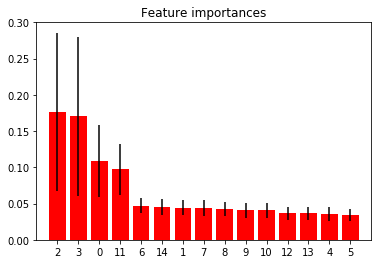

In [556]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(importances)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlim([-1, len(importances)])
plt.show()

In [544]:
from sklearn import svm

clf = svm.SVC()
clf.fit(training_df[feature_columns], training_df.label)

print("Training evaluation")
y_true = training_df.label
y_pred = clf.predict(training_df[feature_columns])
print(classification_report(y_true, y_pred, digits=4))
print(confusion_matrix(y_true, y_pred))
print("accuracy: ", accuracy_score(y_true, y_pred))
print("f1-score: ", f1_score(y_true, y_pred, pos_label="HOLD", average='weighted'))

print("Test evaluation")
y_true = test_df.label
y_pred = clf.predict(test_df[feature_columns])
print(classification_report(y_true, y_pred, digits=4))
print(confusion_matrix(y_true, y_pred))
print("accuracy: ", accuracy_score(y_true, y_pred))
print("f1-score: ", f1_score(y_true, y_pred, pos_label="HOLD", average='weighted'))

Training evaluation
              precision    recall  f1-score   support

        HOLD       0.77      0.62      0.69      1854
      SWITCH       0.83      0.91      0.87      3840

    accuracy                           0.82      5694
   macro avg       0.80      0.77      0.78      5694
weighted avg       0.81      0.82      0.81      5694

[[1158  696]
 [ 340 3500]]
accuracy:  0.8180540920266948
f1-score:  0.8124224473801491
Test evaluation


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'HOLD') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


              precision    recall  f1-score   support

        HOLD       0.71      0.60      0.65       739
      SWITCH       0.81      0.87      0.84      1440

    accuracy                           0.78      2179
   macro avg       0.76      0.74      0.75      2179
weighted avg       0.78      0.78      0.78      2179

[[ 446  293]
 [ 185 1255]]
accuracy:  0.7806333180357963
f1-score:  0.7759512061975488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'HOLD') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
